<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/OSMNX_Shortest_Path_POM_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shortest Path on OSM Network

## Install libraries

In [ ]:
# Install dependencies, uncomment if required

!pip install geopandas
!pip install osmnx
!pip install pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
from google.colab import files

# Mount Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Uncomment and Uninstall if required
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.1.3
# !pip uninstall numpy

## Helper Functions

In [ ]:
# Import the OSMX Functions
!cp drive/MyDrive/Colab_Functions/OSMX_Functions.py "/content/"
from OSMX_Functions import *

## Point to Point (Origin -> Destination)

In [ ]:
# Create the Origin, GFI - Konedobu

origin = gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
origin.at[0, 'geometry'] = Point(147.1587850, -9.4662353)
origin.at[0, 'name'] = 'GFI - Konedobu'
origin

,name,geometry
0,GFI - Konedobu,POINT (147.15878 -9.46624)


In [ ]:
# Create the Destination, Paradise Foods POM
destination = gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
destination.at[0, 'geometry'] = Point(147.1872077, -9.4455959)
destination.at[0, 'name'] = 'Paradise Foods POM'
destination

,name,geometry
0,Paradise Foods POM,POINT (147.18721 -9.44560)


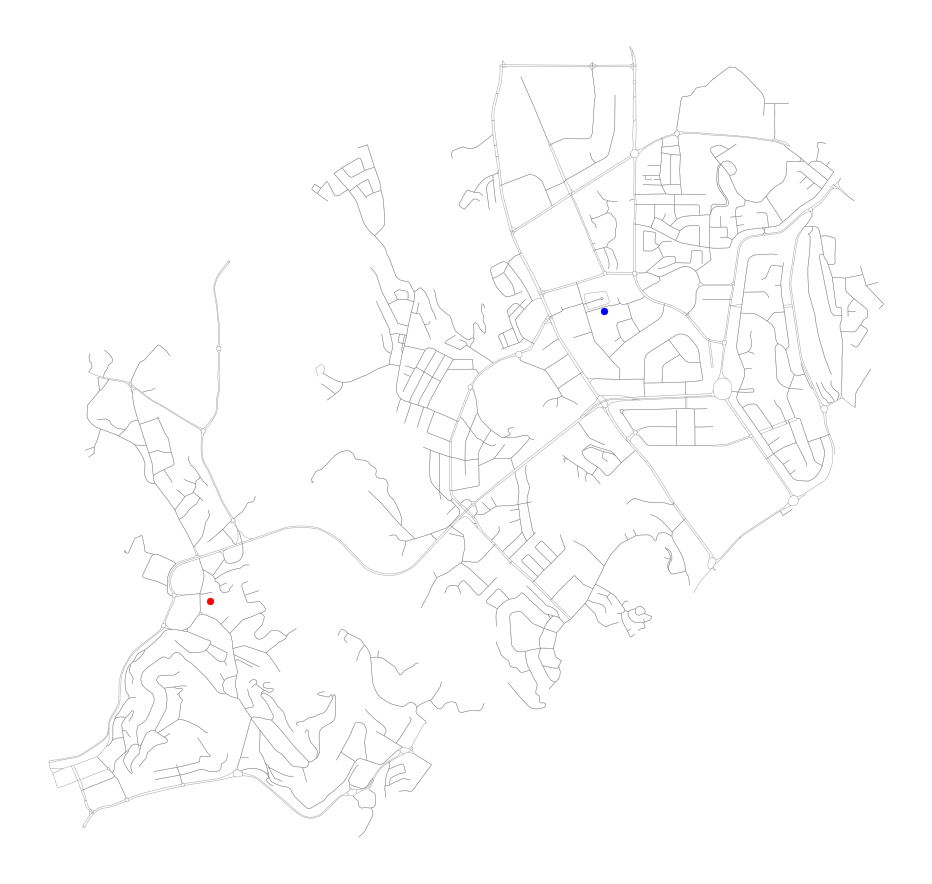

In [ ]:
osm_map(origin, destination)
plt.savefig('drive_network.png')

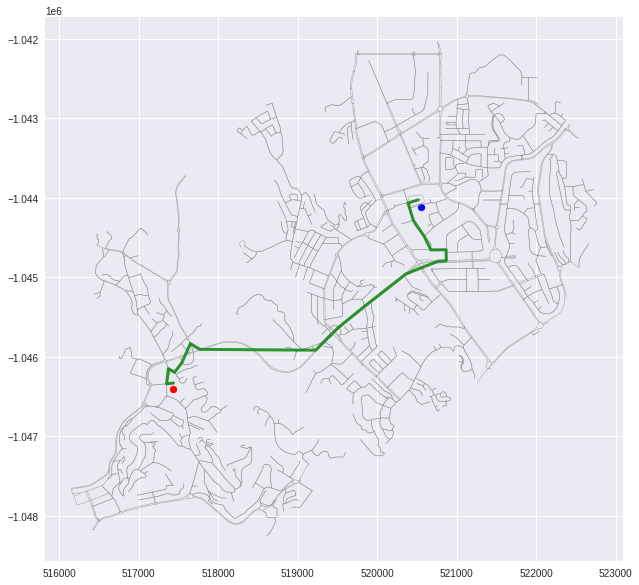

In [ ]:
shortest_path_map(origin, destination, 'drive');
# plt.savefig('driving_network.png')

In [ ]:
drive_gdf = osm_network(origin, destination)
drive_gdf.head()
drive_gdf.to_csv('drive.csv')

In [ ]:
route = shortest_path(origin, destination, 'drive')
route.head()

,geometry
0,"LINESTRING (517450.836 -1046331.118, 517351.84..."


In [ ]:
route.crs

<Derived Projected CRS: +proj=utm +zone=55 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 55N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich


## Multiple Paths (Origin -> Sites)

In [ ]:
# Read dataset from excel in Google Drive to Pandas Data Frame
locations = pd.read_csv('drive/MyDrive/Colab_Data/POM_JMP_Locations.csv', index_col=0)
print(locations.shape)
locations

(10, 2)


,name,geometry
0,WATERFRONT FOODWORLD LTD - KONE,POINT (147.15329489201733 -9.468267924238749)
1,9 Mile Plaza,POINT (147.23293262338223 -9.41381759697949)
2,Paradise Foods POM,POINT (147.18720774908013 -9.44559587922322)
3,RH Hyper Mart,POINT (147.19017459394834 -9.446133442542754)
4,EFM POM ICD,POINT (147.0757354254842 -9.416158162780402)
5,Avenell Engineering Systems,POINT (147.08866867272425 -9.444925643847881)
6,East West/Agility Warehouse,POINT (147.13152281275254 -9.416714527772994)
7,Patricks Transport,POINT (147.1795971514685 -9.487945242439283)
8,GFI - Konedobu,POINT (147.15878495438272 -9.466235344496987)
9,GFI POM- Badili,POINT (147.178480076977 -9.47767768862742)


In [ ]:
# Convert to Pandas Dataframe to GeoDataframe

from shapely import wkt

locations['geometry'] = locations['geometry'].apply(wkt.loads)
locations = gpd.GeoDataFrame(locations, crs = 4326)

In [ ]:
routes = shortest_path(locations, locations, network = 'drive')

Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..
Same origin and destination node. Skipping ..


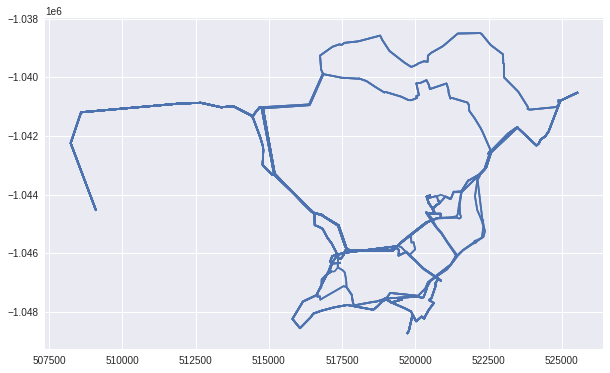

In [ ]:
routes.plot(figsize=(10,20));

In [ ]:
len(routes)

90

In [ ]:
routes.crs

<Derived Projected CRS: +proj=utm +zone=55 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 55N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
routes['distance'] = routes['geometry'].length

routes

,geometry,distance
0,"LINESTRING (516915.670 -1046783.402, 517128.56...",12730.667393
0,"LINESTRING (516915.670 -1046783.402, 517128.56...",6043.380267
0,"LINESTRING (516915.670 -1046783.402, 517128.56...",5868.159954
0,"LINESTRING (516915.670 -1046783.402, 517128.56...",12878.994158
0,"LINESTRING (516915.670 -1046783.402, 517128.56...",16456.249619
...,...,...
0,"LINESTRING (519563.573 -1047575.915, 519183.96...",19017.924111
0,"LINESTRING (519563.573 -1047575.915, 519183.96...",22595.179572
0,"LINESTRING (519563.573 -1047575.915, 519183.96...",13213.037254
0,"LINESTRING (519563.573 -1047575.915, 519183.96...",1955.311934


<ipython-input-116-ef8e91003330>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


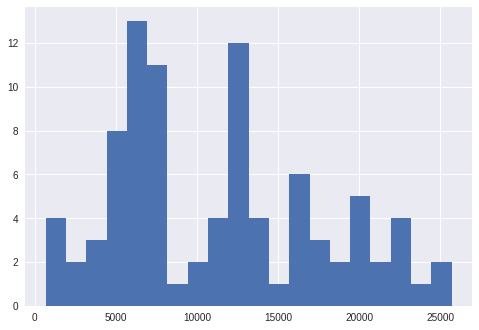

In [ ]:
plt.style.use('seaborn')
routes['distance'].hist(bins=20);

In [ ]:
routes_wgs = routes.to_crs(4326)

In [ ]:
routes_wgs.to_file(r'driving_routes.geojson', driver='GeoJSON')
locations.to_file(r'locations.geojson', driver='GeoJSON')
origin.to_file(r'origin.geojson', driver='GeoJSON')

In [ ]:
driving_network = osm_network(locations, locations, network = 'drive')

In [ ]:
driving_network = driving_network[['geometry']]
driving_network = driving_network.reset_index(drop=True)

driving_network.head()

,geometry
0,"LINESTRING (147.19607 -9.45043, 147.19617 -9.4..."
1,"LINESTRING (147.16078 -9.47800, 147.16089 -9.4..."
2,"LINESTRING (147.16078 -9.47800, 147.16076 -9.4..."
3,"LINESTRING (147.17477 -9.47784, 147.17352 -9.4..."
4,"LINESTRING (147.17477 -9.47784, 147.17603 -9.4..."


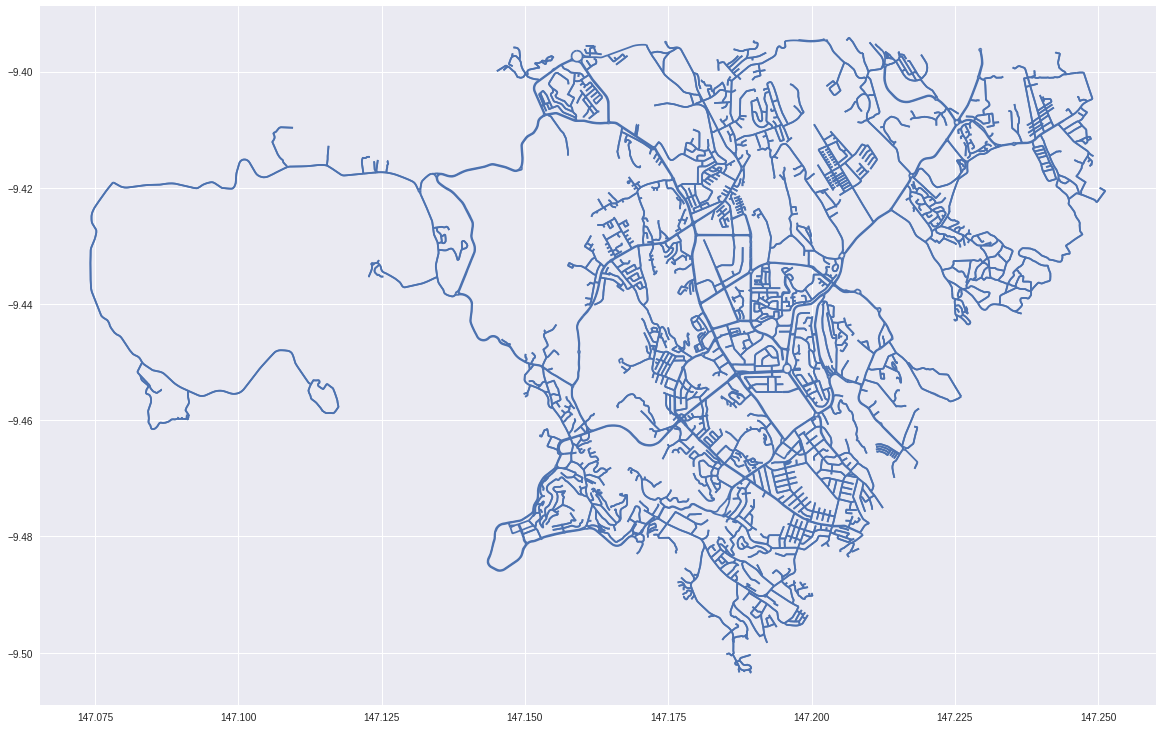

In [ ]:
driving_network.plot(figsize=(20,40));

In [ ]:
driving_network.to_file(r'driving_network.geojson', driver='GeoJSON')